Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=1)









In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

for threshold in np.arange(0.1, 0.9, 0.1):
    model.predict_proba(X_test)[:, 1]
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[threshold, 1], alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.title('Threshold = {}'.format(threshold))
    plt.show()


Как видно из графиков, при изменении порога меняется и граница принятия решений. При низких значениях порога граница смещается в сторону отрицательного класса, а при высоких - в сторону положительного.

Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data = data.data, columns = data.feature_names)
y = data.target
x = df.iloc[:,:]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


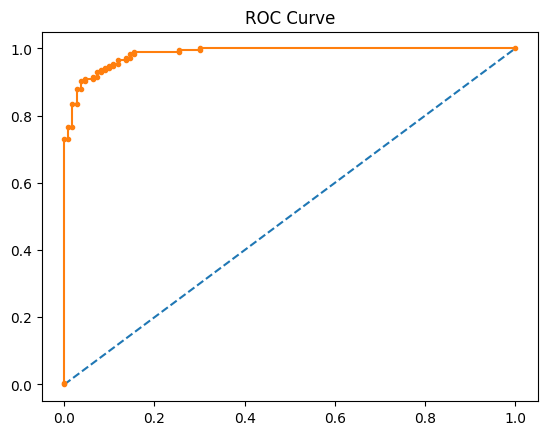

ROC: 0.984


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Построим ROC-кривую и вычислим значение ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.show()

print('ROC: {:.3f}'.format(roc_auc))


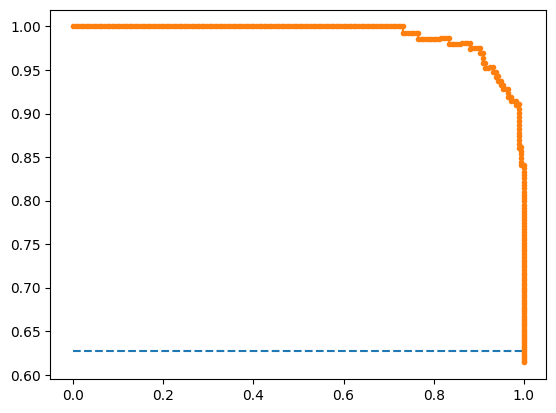

Average Precision: 0.990


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
# Построим PR-кривую и вычислим значение Average Precision
avg_precision = average_precision_score(y_test, y_pred_proba[:, 1])
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

print('Average Precision: {:.3f}'.format(avg_precision))


В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.

Oптимальный порог=0.12859775406687, Средняя геом =0.9487466999952515


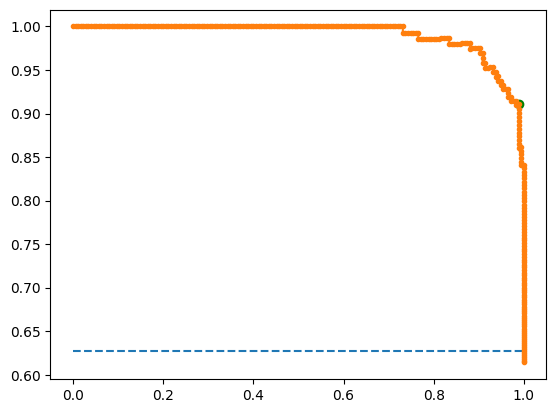

In [ ]:
# оптимизируем по TPR и FPR
from numpy import argmax

geom = (p*r)**0.5 # вычисляет среднее геометрическое между точностью и полнотой
ix = argmax(geom) # находит индекс максимального значения среднего геометрического
print(f'Oптимальный порог={pr_thresholds[ix]}, Средняя геом ={geom[ix]}')

plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='green') # оптимальный порог
plt.show()

При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.

           Metric  Threshold   F-score
0     F по recall   0.003024  0.998136
1  F по precision   0.974446  0.733379


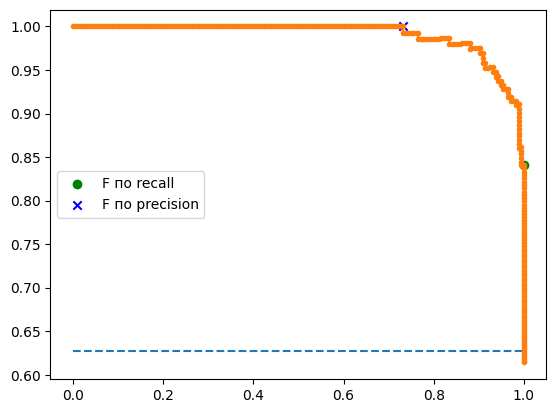

Порог =  0.003023907592870461
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       110
           1       0.84      0.99      0.91       175

    accuracy                           0.88       285
   macro avg       0.91      0.85      0.87       285
weighted avg       0.90      0.88      0.88       285

Порог =  0.974445925693675
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       110
           1       1.00      0.73      0.84       175

    accuracy                           0.83       285
   macro avg       0.85      0.86      0.83       285
weighted avg       0.88      0.83      0.83       285



In [ ]:
# Вычисляем F-меры
F_recall = ((1+10**2)*p*r)/((10**2)*p+r)
F_pres = ((1+(0.01)**2)*p*r)/(((0.01)**2)*p+r)


ix_recall = argmax(F_recall)
ix_pres = argmax(F_pres)


results = pd.DataFrame({
    'Metric': ['F по recall', 'F по precision'],
    'Threshold': [pr_thresholds[ix_recall], pr_thresholds[ix_pres]],
    'F-score': [F_recall[ix_recall], F_recall[ix_pres]]
})


print(results)


plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix_recall], p[ix_recall], marker='o', color='green', label='F по recall')
plt.scatter(r[ix_pres], p[ix_pres], marker='x', color='blue', label='F по precision')
plt.legend()
plt.show()
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix_recall]).astype('int')
print("Порог = ", pr_thresholds[ix_recall])
print(metrics.classification_report(y_test, y_pred))

y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix_pres]).astype('int')
print("Порог = ", pr_thresholds[ix_pres])
print(metrics.classification_report(y_test, y_pred))

Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.

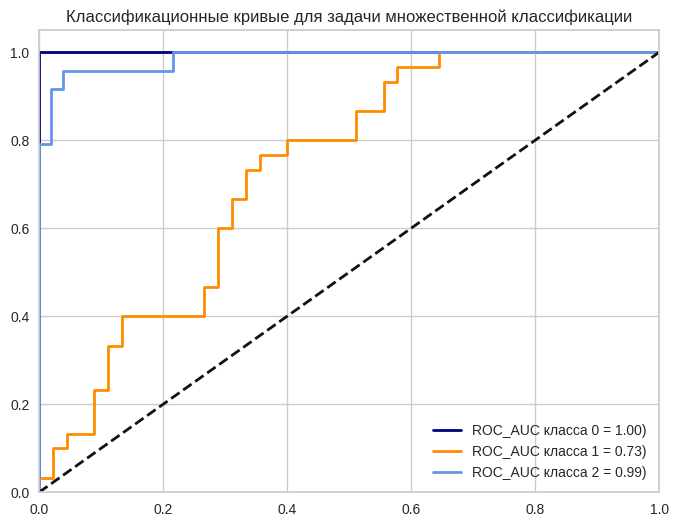

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Обучение классификатора
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
classifier.fit(X_train, y_train)

# Получение вероятностей
y_score = classifier.predict_proba(X_test)

plt.figure(figsize=(8, 6))
colors = ['navy', 'darkorange', 'cornflowerblue']
for i in range(3):
  fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'ROC_AUC класса {i} = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.title('Классификационные кривые для задачи множественной классификации')
plt.legend(loc='lower right')
plt.show()


Используйте для построения кривых библиотеку yellowbrick.

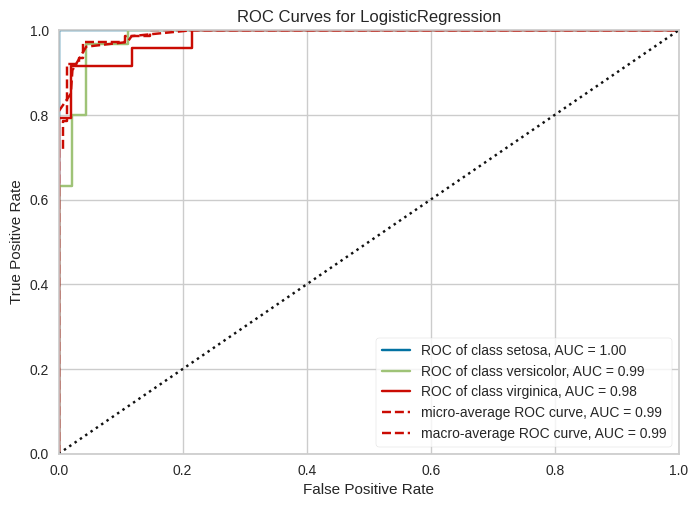

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ROCAUC

data = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

visualizer = ROCAUC(classifier, classes=data.target_names)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()